# PREDICCIÓN DE LA PRODUCCIÓN DE ENERGÍA SOLAR


# Importación de librerías

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import time

# Librerías de métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Librerías de modelos
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import PredefinedSplit

# Librerías de búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV


# Importación de datos

In [64]:
disp_df = pd.read_csv("datos/disp_st2ns1.txt.bz2",
    compression="bz2",
    index_col=0)

# Analisis Exploratorio de Datos

Comprobamos la cantidad de datos que tenemos en el dataset

In [65]:
disp_df_eda = disp_df.copy()

print('Cantidad de Filas y columnas:', disp_df_eda.shape)
print('Nombre columnas:', disp_df_eda.columns)

Cantidad de Filas y columnas: (4380, 76)
Nombre columnas: Index(['apcp_sf1_1', 'apcp_sf2_1', 'apcp_sf3_1', 'apcp_sf4_1', 'apcp_sf5_1',
       'dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s4_1', 'dlwrf_s5_1',
       'dswrf_s1_1', 'dswrf_s2_1', 'dswrf_s3_1', 'dswrf_s4_1', 'dswrf_s5_1',
       'pres_ms1_1', 'pres_ms2_1', 'pres_ms3_1', 'pres_ms4_1', 'pres_ms5_1',
       'pwat_ea1_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1', 'pwat_ea5_1',
       'spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1',
       'tcdc_ea1_1', 'tcdc_ea2_1', 'tcdc_ea3_1', 'tcdc_ea4_1', 'tcdc_ea5_1',
       'tcolc_e1_1', 'tcolc_e2_1', 'tcolc_e3_1', 'tcolc_e4_1', 'tcolc_e5_1',
       'tmax_2m1_1', 'tmax_2m2_1', 'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1',
       'tmin_2m1_1', 'tmin_2m2_1', 'tmin_2m3_1', 'tmin_2m4_1', 'tmin_2m5_1',
       'tmp_2m_1_1', 'tmp_2m_2_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1',
       'tmp_sfc1_1', 'tmp_sfc2_1', 'tmp_sfc3_1', 'tmp_sfc4_1', 'tmp_sfc5_1',
       'ulwrf_s1_1

Comprobamos si existen missing values en los datos; para ello utilizamos el método .info()

In [66]:
disp_df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, V1 to V4380
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  4380 non-null   float64
 1   apcp_sf2_1  4380 non-null   float64
 2   apcp_sf3_1  4380 non-null   float64
 3   apcp_sf4_1  4380 non-null   float64
 4   apcp_sf5_1  4380 non-null   float64
 5   dlwrf_s1_1  4380 non-null   float64
 6   dlwrf_s2_1  4380 non-null   float64
 7   dlwrf_s3_1  4380 non-null   float64
 8   dlwrf_s4_1  4380 non-null   float64
 9   dlwrf_s5_1  4380 non-null   float64
 10  dswrf_s1_1  4380 non-null   float64
 11  dswrf_s2_1  4380 non-null   float64
 12  dswrf_s3_1  4380 non-null   float64
 13  dswrf_s4_1  4380 non-null   float64
 14  dswrf_s5_1  4380 non-null   float64
 15  pres_ms1_1  4380 non-null   float64
 16  pres_ms2_1  4380 non-null   float64
 17  pres_ms3_1  4380 non-null   float64
 18  pres_ms4_1  4380 non-null   float64
 19  pres_ms5_1  4380 non-null   fl

In [67]:
disp_df_eda.describe()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,...,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03
mean,0.606809,0.252764,0.480446,0.271476,0.514641,316.698532,317.381851,324.682998,343.757513,343.097254,...,247.300145,251.597699,261.916025,260.870143,0.076235,38.585222,76.064674,126.504047,99.087049,1.629826e+07
std,2.275740,0.999809,1.774720,1.086599,1.886735,55.637609,57.874376,58.702133,60.860672,60.693451,...,36.804219,36.382653,39.190955,38.734023,0.255491,25.984861,30.784078,40.571154,35.454368,7.965298e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,158.971770,160.032903,165.524543,183.671312,186.342961,...,113.559602,118.679132,119.393449,121.951425,0.000000,0.000000,3.181818,4.363636,2.545455,5.100000e+05
25%,0.000000,0.000000,0.000000,0.000000,0.000000,271.219564,268.889864,275.709318,293.757163,292.834810,...,230.482578,233.976283,245.721419,243.850282,0.000000,14.000000,53.431818,108.454545,74.795455,1.062375e+07
50%,0.000000,0.000000,0.000000,0.000000,0.000000,321.106932,323.063311,329.708327,346.763388,345.883918,...,253.309217,257.270334,270.790095,269.300432,0.000000,35.363636,79.272727,135.909091,104.818182,1.635690e+07
75%,0.109091,0.051818,0.127500,0.036364,0.090909,366.145476,370.147353,378.509126,399.600853,398.728281,...,274.861445,278.800420,290.139446,289.699652,0.000000,61.818182,102.727273,155.204545,129.545455,2.312775e+07
max,43.009090,16.846364,28.399091,26.381818,36.875455,426.173970,427.486894,429.693146,455.566337,453.910406,...,311.991660,315.569164,328.920274,327.253141,1.000000,92.272727,192.636364,450.636364,313.909091,3.122700e+07


Utilizando el método .describe() obtenemos información estadística de los datos; podemos obsevar que algunos campos presentan outliers (por ejemplo, en los campos relacionados con las precipitaciones 'apcp_sfx'). Podría ser interesante eliminar estos outliers para mejorar la predicción. 

Tomamos una muestra de las 15 variables en el primer momento del día siguiente para ver como se distribuyen los datos

In [68]:
for field in disp_df_eda:
    if field[-3] != "i" and int(field[-3]) != 1:
        disp_df_eda.drop(field, axis=1, inplace=True)

### Correlación entre variables

<Axes: >

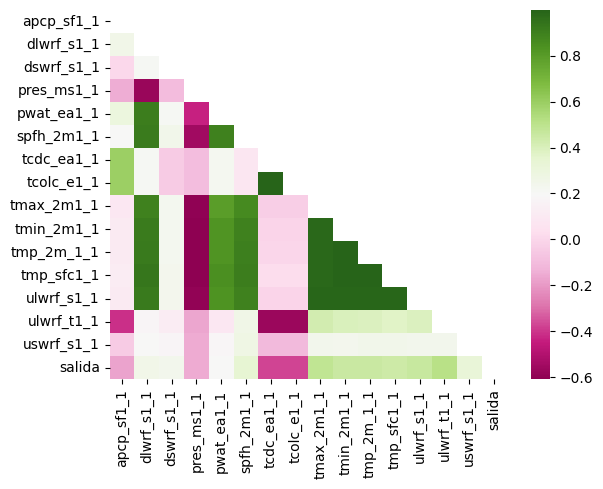

In [69]:
corr = disp_df_eda.corr()
lower_tri = corr.where(np.tril(np.ones(corr.shape),k=-1).astype(bool)) 
sns.heatmap(lower_tri, xticklabels=corr.columns, yticklabels=corr.columns, cmap= "PiYG" )

Según el gráfico podemos observar que existe correlación entre diferentes variables, tanto positiva como negativamente. Podemos observar que las variables que mayor correlacción positiva presentan son aquellas correspondientes a la temperatura (tmax_2m1,...,tmp_sfc1) con la variable de ulwrf_t1. Por otro lado, las variables que presentan mayor correlacción negativa son las relacionadas con la presión atmosférica (pres_ms1) con las variables de temperatura (tmax_2m1,...,tmp_sfc1) y con la variable de ulwrf_t1.

Podria ser interesante eliminar las variables con mayor correlación entre sí para mejorar la predicción.

Usando el método .corr() obtenemos la matriz de correlación entre las variables. Para más adelante poder eliminar los atributos más correlacionados, añadimos sus índices a una lista (to_drop_num). El threshold de correlación que hemos utilizado es de 0.95. 

In [82]:
corr = disp_df.corr()
lower_tri = corr.where(np.tril(np.ones(corr.shape),k=-1).astype(bool)) 
to_drop = []
to_drop_num = []

for field in lower_tri:
    for index, row in lower_tri.iterrows():
        if row[field] > 0.95 or row[field] < -0.95:
            if index not in to_drop:
                to_drop.append(index)
                #insert the numeric index of the column to drop
                to_drop_num.append(disp_df.columns.get_loc(index))

print("Eliminamos un total de ", len(to_drop), " columnas")
print("Los atributos que superán el threshold de correlación son:",to_drop)


Eliminamos un total de  51  columnas
Los atributos que superán el threshold de correlación son: ['dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s4_1', 'dlwrf_s5_1', 'dswrf_s3_1', 'uswrf_s2_1', 'dswrf_s5_1', 'pres_ms2_1', 'pres_ms3_1', 'pres_ms4_1', 'pres_ms5_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1', 'pwat_ea5_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1', 'tcolc_e1_1', 'tcolc_e2_1', 'tcolc_e3_1', 'tcolc_e4_1', 'tcolc_e5_1', 'tmax_2m2_1', 'tmin_2m1_1', 'tmin_2m2_1', 'tmin_2m3_1', 'tmp_2m_1_1', 'tmp_2m_2_1', 'tmp_sfc1_1', 'tmp_sfc2_1', 'ulwrf_s1_1', 'ulwrf_s2_1', 'ulwrf_s3_1', 'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1', 'tmin_2m4_1', 'tmin_2m5_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1', 'tmp_sfc3_1', 'tmp_sfc5_1', 'ulwrf_s5_1', 'tmp_sfc4_1', 'ulwrf_s4_1', 'ulwrf_t3_1', 'ulwrf_t5_1', 'uswrf_s5_1']


Con esto podemos observar que la mayoría de variables tienen una alta correlación con otras variables, por lo que es posible que no aporten información relevante para la predicción.

### Detección de valores atípicos

Como hemos comentado anteriormente, con el método .describe() hemos podido observar que algunos campos presentan outliers (por ejemplo, en los campos relacionados con las precipitaciones 'apcp_sfx'). Podría ser interesante eliminar estos outliers para mejorar la predicción.

In [86]:
disp_df_wo_outliers = disp_df.copy()
# Quitamos la variable de salida
disp_df_wo_outliers.drop("salida", axis=1, inplace=True)
        
disp_df_std = disp_df_wo_outliers.std()
disp_df_mean = disp_df_wo_outliers.mean()
anomaly_cut_off = disp_df_std * 2
lower_limit  = disp_df_mean - anomaly_cut_off
upper_limit = disp_df_mean + anomaly_cut_off

for index, row in disp_df_wo_outliers.iterrows():
    if row.iloc[0] < lower_limit.iloc[0] or row.iloc[0] > upper_limit.iloc[0]:
        disp_df_wo_outliers.drop(index, inplace=True)

# Observamos los rangos de cada una de las variables
disp_df_wo_outliers.describe()


,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1
count,4230.000000,4230.000000,4230.000000,4230.000000,4230.000000,4230.000000,4230.000000,4230.000000,4230.000000,4230.000000,...,4230.000000,4230.000000,4230.000000,4230.000000,4230.000000,4230.000000,4230.000000,4230.000000,4230.000000,4230.000000
mean,0.259614,0.154905,0.336099,0.235047,0.451204,314.641517,315.409871,322.937716,342.664584,342.105670,...,250.036040,249.136546,253.141453,262.808056,261.671619,0.077799,39.238491,77.151429,127.586568,99.829207
std,0.742976,0.614578,1.305752,1.015293,1.774796,55.269262,57.582609,58.578856,60.965630,60.811938,...,33.966830,35.100774,35.151897,38.703839,38.337437,0.258245,25.963549,30.256642,39.502473,34.899557
min,0.000000,0.000000,0.000000,0.000000,0.000000,158.971770,160.032903,165.524543,183.671312,186.342961,...,104.671267,113.559602,118.679132,121.308241,121.951425,0.000000,0.181818,3.181818,4.363636,2.545455
25%,0.000000,0.000000,0.000000,0.000000,0.000000,268.817731,266.617597,274.094299,292.603136,291.860622,...,232.744513,232.472175,235.969352,247.077783,244.740406,0.000000,14.363636,54.386364,109.545455,75.363636
50%,0.000000,0.000000,0.000000,0.000000,0.000000,317.834014,318.926995,325.961816,344.859621,344.165780,...,254.374614,254.382005,258.233849,271.569437,270.119333,0.000000,36.363636,80.454545,137.000000,105.590909
75%,0.064318,0.033636,0.088182,0.022727,0.061818,364.124166,367.786384,376.747921,398.479377,397.905694,...,275.348900,275.696218,279.347739,290.653478,290.077095,0.000000,62.545455,103.431818,155.454545,129.727273
max,5.151818,13.916364,28.399091,26.381818,36.875455,426.173970,427.486894,429.693146,455.566337,453.910406,...,318.245345,311.991660,315.569164,328.920274,327.253141,1.000000,92.272727,192.636364,450.636364,313.909091


Podemos observar que elimnando los outliers, se reduce el rango de las variables aunque los datos siguen siendo muy dispares. Sin embargo, no vemos apropiado eliminar más outliers ya que perderíamos demasiada información.

# Preparación de datos


## Train, test y validación

Dividimos los datos en los conjuntos de train y test. A su vez dividimos el conjunto de train para preparar las comparaciones entre los diferentes modelos.

In [72]:
train = disp_df.iloc[:10*365]
test = disp_df.iloc[10*365:]

N_train_train = 365*8
N_train_val = 365*2

train_fold = [-1]*N_train_train + [0]*N_train_val

split_index = PredefinedSplit(test_fold=train_fold)


In [73]:
X_disp = disp_df.iloc[:, :75]
Y_disp = disp_df.iloc[:, 75]

train = disp_df.iloc[:10*365]
test = disp_df.iloc[10*365:]

X_train = train.iloc[:, :75]
Y_train = train.iloc[:, 75]

X_test = test.iloc[:, :75]
Y_test = test.iloc[:, 75]

train_train = train.iloc[:8*365]
train_validation = train.iloc[8*365:]

# Separamos la variable objetivo en los sets de entrenamiento y validación
X_train_train = train_train.iloc[:, :75]
Y_train_train = train_train.iloc[:, 75]
X_train_validation = train_validation.iloc[:, :75]
Y_train_validation = train_validation.iloc[:, 75]


## Datos comunes

### Normalización

In [74]:
scaler_x = StandardScaler()
X_train_norm = scaler_x.fit_transform(X_train)
X_test_norm = scaler_x.transform(X_test)

scaler_y = StandardScaler()
Y_train_norm = scaler_y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()
Y_test_norm = scaler_y.transform(Y_test.values.reshape(-1, 1)).ravel()


In [75]:
scaler_x = StandardScaler()
X_train_train_norm = scaler_x.fit_transform(X_train_train)
X_train_validation_norm = scaler_x.transform(X_train_validation)

scaler_y = StandardScaler()
Y_train_train_norm = scaler_y.fit_transform(Y_train_train.values.reshape(-1, 1)).ravel()
Y_train_validation_norm = scaler_y.transform(Y_train_validation.values.reshape(-1, 1)).ravel()

# Baseline

## Creación de un modelo dummy

In [76]:
dummy = DummyRegressor(strategy="median")
dummy.fit(X_train_train, Y_train_train)
dummy_pred = dummy.predict(X_train_validation)

dummy_mae = mean_absolute_error(Y_train_validation, dummy_pred)
print("dummy MAE: ", dummy_mae)

dummy_rmse = np.sqrt(mean_squared_error(Y_train_validation,dummy_pred))
print("dummy RMSE: ", dummy_rmse)

dummy_score = dummy.score(X_train_validation, Y_train_validation)
print("dummy score: ", dummy_score)

dummy MAE:  6720947.2602739725
dummy RMSE:  7809144.902737563
dummy score:  -0.003940687559321532


## Métodos Básicos

### KNeighborsRegressor 

In [77]:
start = time.time()

KNN_reg = KNeighborsRegressor()

KNN_reg.fit(X_train_train_norm, Y_train_train_norm)
KNN_reg_pred_norm = KNN_reg.predict(X_train_validation_norm)
KNN_reg_pred = scaler_y.inverse_transform(KNN_reg_pred_norm.reshape(-1, 1)).ravel()

end = time.time()

# Métricas
KNN_reg_mae = mean_absolute_error(Y_train_validation, KNN_reg_pred)
print("MAE: ", KNN_reg_mae)

KNN_reg_rmse = np.sqrt(mean_squared_error(Y_train_validation, KNN_reg_pred))
print("RMSE: ", KNN_reg_rmse)


print("Puntuación: ", KNN_reg.score(X_train_validation_norm, Y_train_validation_norm))
print("Tiempo de ejecución: ", end - start)

MAE:  2536714.7671232875
RMSE:  3675153.3534838464
Puntuación:  0.777642376391267
Tiempo de ejecución:  0.044785499572753906


### Árbol de regresión

In [78]:
start = time.time()

tree_reg = DecisionTreeRegressor(random_state=2)
tree_reg.fit(X_train_train, Y_train_train)
tree_reg_pred = tree_reg.predict(X_train_validation)

end = time.time()

tree_reg_mae = mean_absolute_error(Y_train_validation, tree_reg_pred)
print("MAE: ", tree_reg_mae)

tree_reg_rmse = np.sqrt(mean_squared_error(Y_train_validation, tree_reg_pred))
print("RMSE: ", tree_reg_rmse)

print("Puntuación: ", tree_reg.score(X_train_validation, Y_train_validation))
print("Tiempo de ejecución: ", end - start)


MAE:  3344148.493150685
RMSE:  4829894.676721137
Puntuación:  0.6159600420419615
Tiempo de ejecución:  0.15796446800231934


### Regresión lineal

In [79]:
start = time.time()

li_reg = LinearRegression()
li_reg.fit(X_train_train, Y_train_train)
li_reg_pred = li_reg.predict(X_train_validation)

end = time.time()

li_reg_mae = mean_absolute_error(Y_train_validation, li_reg_pred)
print("MAE: ", li_reg_mae)

li_reg_rmse = np.sqrt(mean_squared_error(Y_train_validation, li_reg_pred))
print("RMSE: ", li_reg_rmse)

print("Puntuación: ", li_reg.score(X_train_validation, Y_train_validation))
print("Tiempo de ejecución: ", end - start)


MAE:  2265683.8029644317
RMSE:  3268115.4760422744
Puntuación:  0.8241688243984733
Tiempo de ejecución:  0.026917219161987305


## Métodos Avanzados

### SVM

In [80]:
start = time.time()

svm = SVR()

svm.fit(X_train_train_norm, Y_train_train_norm)
y_pred_norm = svm.predict(X_train_validation_norm)
y_pred = scaler_y.inverse_transform(y_pred_norm.reshape(-1, 1)).ravel()

end = time.time()

svm_mae = mean_absolute_error(Y_train_validation, y_pred)
print("MAE: ", svm_mae)

svm_rmse = np.sqrt(mean_squared_error(Y_train_validation, y_pred))
print("RMSE: ", svm_rmse)

print("Puntuación: ", svm.score(X_train_validation_norm, Y_train_validation_norm))
print("Tiempo de ejecución: ", end - start)


MAE:  2224652.794901519
RMSE:  3353514.55860678
Puntuación:  0.8148594775863227
Tiempo de ejecución:  0.4767160415649414


### Random Forest

In [81]:
start = time.time()

rfr = RandomForestRegressor(random_state=2)
rfr.fit(X_train_train, Y_train_train)
rfr_pred = rfr.predict(X_train_validation)

end = time.time()

rfr_mae = mean_absolute_error(Y_train_validation, rfr_pred)
print("MAE: ", rfr_mae)

rfr_rmse = np.sqrt(mean_squared_error(Y_train_validation, rfr_pred))
print("RMSE: ", rfr_rmse)

print("Puntuación: ", rfr.score(X_train_validation, Y_train_validation))
print("Tiempo de ejecución: ", end - start)


KeyboardInterrupt: 

# Ajuste de hiperparámetros por búsqueda en cuadrícula

## Métodos básicos

### KNeighborsRegressor

In [ ]:
start = time.time()

param_grid = {
    'n_neighbors': np.arange(1, 20), 
    'weights': ['uniform', 'distance'], 
    'p': [1, 2, 3, 4]
    }

grid = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], 
    refit='neg_mean_squared_error',
    cv=split_index,
    verbose=3,
    n_jobs=-1)

grid.fit(X_train_norm, Y_train_norm)

end = time.time()

knn_best_params = grid.best_params_

print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)


Fitting 1 folds for each of 152 candidates, totalling 152 fits
[CV 1/1] END n_neighbors=1, p=2, weights=uniform; neg_mean_absolute_error: (test=-0.421) neg_mean_squared_error: (test=-0.352) total time=   0.1s
[CV 1/1] END n_neighbors=1, p=2, weights=distance; neg_mean_absolute_error: (test=-0.421) neg_mean_squared_error: (test=-0.352) total time=   0.1s
[CV 1/1] END n_neighbors=2, p=2, weights=uniform; neg_mean_absolute_error: (test=-0.366) neg_mean_squared_error: (test=-0.270) total time=   0.1s
[CV 1/1] END n_neighbors=1, p=1, weights=distance; neg_mean_absolute_error: (test=-0.418) neg_mean_squared_error: (test=-0.351) total time=   0.3s
[CV 1/1] END n_neighbors=2, p=2, weights=distance; neg_mean_absolute_error: (test=-0.365) neg_mean_squared_error: (test=-0.269) total time=   0.1s
[CV 1/1] END n_neighbors=1, p=1, weights=uniform; neg_mean_absolute_error: (test=-0.418) neg_mean_squared_error: (test=-0.351) total time=   0.3s
[CV 1/1] END n_neighbors=2, p=1, weights=uniform; neg_mean

Evaluación del modelo

In [ ]:
# Entrenar modelo
mejor_modelo = KNeighborsRegressor(**grid.best_params_)
mejor_modelo.fit(X_train_train_norm, Y_train_train_norm)

y_pred = mejor_modelo.predict(X_train_validation_norm)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()


# Evaluacion
mejor_modelo_mae = mean_absolute_error(Y_train_validation, y_pred)
print("MAE: ", mejor_modelo_mae)
mejor_modelo_rmse = np.sqrt(mean_squared_error(Y_train_validation, y_pred))
print("RMSE: ", mejor_modelo_rmse)
print("Puntuación: ", mejor_modelo.score(X_train_validation_norm, Y_train_validation_norm))

MAE:  2387481.5550863626
RMSE:  3461006.5864845184
Puntuación:  0.8028004387936578


### Árboles de regresión

In [ ]:
start = time.time()

param_grid = {
    'max_depth': range(2, 16, 2),
    'min_samples_split': range(2, 16, 2)
}

grid = GridSearchCV(estimator=DecisionTreeRegressor(random_state=2),
                    param_grid=param_grid,
                    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], 
                    refit='neg_mean_squared_error',
                    cv=split_index, 
                    n_jobs=1,
                    verbose=3)

grid.fit(X_train, Y_train)

end = time.time()

tree_reg_best_params = grid.best_params_


print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)

Fitting 1 folds for each of 49 candidates, totalling 49 fits
[CV 1/1] END max_depth=2, min_samples_split=2; neg_mean_absolute_error: (test=-3244362.219) neg_mean_squared_error: (test=-18202665743970.688) total time=   0.0s
[CV 1/1] END max_depth=2, min_samples_split=4; neg_mean_absolute_error: (test=-3244362.219) neg_mean_squared_error: (test=-18202665743970.688) total time=   0.0s
[CV 1/1] END max_depth=2, min_samples_split=6; neg_mean_absolute_error: (test=-3244362.219) neg_mean_squared_error: (test=-18202665743970.688) total time=   0.0s
[CV 1/1] END max_depth=2, min_samples_split=8; neg_mean_absolute_error: (test=-3244362.219) neg_mean_squared_error: (test=-18202665743970.688) total time=   0.0s
[CV 1/1] END max_depth=2, min_samples_split=10; neg_mean_absolute_error: (test=-3244362.219) neg_mean_squared_error: (test=-18202665743970.688) total time=   0.0s
[CV 1/1] END max_depth=2, min_samples_split=12; neg_mean_absolute_error: (test=-3244362.219) neg_mean_squared_error: (test=-1820

Evaluación del modelo

In [ ]:
# Entrenar modelo
mejor_modelo = DecisionTreeRegressor(**grid.best_params_)
mejor_modelo.fit(X_train_train, Y_train_train)

y_pred = mejor_modelo.predict(X_train_validation)


# Evaluacion
mejor_modelo_mae = mean_absolute_error(Y_train_validation, y_pred)
print("MAE: ", mejor_modelo_mae)
mejor_modelo_rmse = np.sqrt(mean_squared_error(Y_train_validation, y_pred))
print("RMSE: ", mejor_modelo_rmse)
print("Puntuación: ", mejor_modelo.score(X_train_validation, Y_train_validation))

MAE:  2632126.199774195
RMSE:  3739779.928136276
Puntuación:  0.7697534213990718


### Regresión lineal

In [ ]:
start = time.time()

param_grid ={
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
    
}

grid = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], 
    refit='neg_mean_squared_error',
    cv=split_index,
    n_jobs=-1,
    verbose=3)


grid.fit(X_train, Y_train)

end = time.time()

li_reg_best_params = grid.best_params_


print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)

Fitting 1 folds for each of 8 candidates, totalling 8 fits
[CV 1/1] END copy_X=True, fit_intercept=True, positive=True; neg_mean_absolute_error: (test=-2652935.351) neg_mean_squared_error: (test=-13477287878953.451) total time=   0.0s
[CV 1/1] END copy_X=False, fit_intercept=False, positive=True; neg_mean_absolute_error: (test=-2789756.199) neg_mean_squared_error: (test=-13999675425169.436) total time=   0.0s
[CV 1/1] END copy_X=True, fit_intercept=False, positive=True; neg_mean_absolute_error: (test=-2789756.199) neg_mean_squared_error: (test=-13999675425169.436) total time=   0.0s
[CV 1/1] END copy_X=False, fit_intercept=True, positive=True; neg_mean_absolute_error: (test=-2652935.351) neg_mean_squared_error: (test=-13477287878953.451) total time=   0.0s
[CV 1/1] END copy_X=False, fit_intercept=True, positive=False; neg_mean_absolute_error: (test=-2265683.803) neg_mean_squared_error: (test=-10680578764753.361) total time=   0.0s
[CV 1/1] END copy_X=False, fit_intercept=False, positiv

Evaluación del modelo

In [ ]:
# Entrenar modelo
mejor_modelo = LinearRegression(**grid.best_params_)
mejor_modelo.fit(X_train_train, Y_train_train)

y_pred = mejor_modelo.predict(X_train_validation)


# Evaluacion
mejor_modelo_mae = mean_absolute_error(Y_train_validation, y_pred)
print("MAE: ", mejor_modelo_mae)
mejor_modelo_rmse = np.sqrt(mean_squared_error(Y_train_validation, y_pred))
print("RMSE: ", mejor_modelo_rmse)
print("Puntuación: ", mejor_modelo.score(X_train_validation, Y_train_validation))

MAE:  2265683.8029644317
RMSE:  3268115.4760422744
Puntuación:  0.8241688243984733


## Métodos avanzados

### SVM

In [ ]:
start = time.time()

param_grid ={
    'gamma': ['scale', 'auto'],
    'C': [0.1, 1, 10, 100, 1000],
}

grid = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'], 
    refit='neg_mean_squared_error',
    cv=split_index,
    n_jobs=4,
    verbose=3)


grid.fit(X_train_norm, Y_train_norm)

end = time.time()

svm_best_params = grid.best_params_

# print(grid.score(X_train_validation, Y_train_validation))
print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)


Fitting 1 folds for each of 10 candidates, totalling 10 fits
[CV 1/1] END C=0.1, gamma=auto; neg_mean_absolute_error: (test=-0.291) neg_mean_squared_error: (test=-0.187) total time=   0.6s
[CV 1/1] END C=0.1, gamma=scale; neg_mean_absolute_error: (test=-0.291) neg_mean_squared_error: (test=-0.187) total time=   0.6s
[CV 1/1] END C=1, gamma=auto; neg_mean_absolute_error: (test=-0.276) neg_mean_squared_error: (test=-0.173) total time=   0.6s
[CV 1/1] END C=1, gamma=scale; neg_mean_absolute_error: (test=-0.276) neg_mean_squared_error: (test=-0.173) total time=   0.7s
[CV 1/1] END C=10, gamma=auto; neg_mean_absolute_error: (test=-0.291) neg_mean_squared_error: (test=-0.187) total time=   1.1s
[CV 1/1] END C=10, gamma=scale; neg_mean_absolute_error: (test=-0.291) neg_mean_squared_error: (test=-0.187) total time=   1.1s
[CV 1/1] END C=100, gamma=scale; neg_mean_absolute_error: (test=-0.321) neg_mean_squared_error: (test=-0.216) total time=   4.8s
[CV 1/1] END C=100, gamma=auto; neg_mean_abso

Evaluación del modelo

In [ ]:
# Entrenar modelo    
mejor_modelo = SVR(**svm_best_params) 
mejor_modelo.fit(X_train_train_norm, Y_train_train_norm)

y_pred = mejor_modelo.predict(X_train_validation_norm)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()


# Evaluacion
svm_mae = mean_absolute_error(Y_train_validation, y_pred)
print("MAE: ", svm_mae)

svm_rmse = np.sqrt(mean_squared_error(Y_train_validation, y_pred))
print("RMSE: ", svm_rmse)

print("Puntuación: ", mejor_modelo.score(X_train_validation_norm, Y_train_validation_norm))

MAE:  2224652.7949015237
RMSE:  3353514.558606785
Puntuación:  0.8148594775863223


### Random Forest

In [ ]:
start = time.time()

param_grid ={
    'n_estimators': range(10, 100, 10),
    'max_depth': range(2, 16, 2),
    'max_features': ['sqrt', 'log2', 25],
}

grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=2),
    param_grid=param_grid,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], 
    refit='neg_mean_squared_error',
    cv= split_index,
    n_jobs=-1,
    verbose=3)

grid.fit(X_train, Y_train)

end = time.time()

rfr_best_params = grid.best_params_


print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)

Fitting 1 folds for each of 189 candidates, totalling 189 fits
[CV 1/1] END max_depth=2, max_features=sqrt, n_estimators=10; neg_mean_absolute_error: (test=-3109831.994) neg_mean_squared_error: (test=-16325534547388.521) total time=   0.1s
[CV 1/1] END max_depth=2, max_features=log2, n_estimators=40; neg_mean_absolute_error: (test=-3100961.297) neg_mean_squared_error: (test=-16096411241957.438) total time=   0.3s
[CV 1/1] END max_depth=2, max_features=log2, n_estimators=20; neg_mean_absolute_error: (test=-3122747.752) neg_mean_squared_error: (test=-16249378597183.627) total time=   0.1s
[CV 1/1] END max_depth=2, max_features=sqrt, n_estimators=40; neg_mean_absolute_error: (test=-3095891.285) neg_mean_squared_error: (test=-15902613218844.553) total time=   0.4s
[CV 1/1] END max_depth=2, max_features=sqrt, n_estimators=20; neg_mean_absolute_error: (test=-3091687.083) neg_mean_squared_error: (test=-15933824642229.967) total time=   0.2s
[CV 1/1] END max_depth=2, max_features=sqrt, n_estim

Evaluación del modelo

In [ ]:
# Entrenar modelo
mejor_modelo = RandomForestRegressor(**grid.best_params_)
mejor_modelo.fit(X_train_train, Y_train_train)

y_pred = mejor_modelo.predict(X_train_validation)


# Evaluacion
mejor_modelo_mae = mean_absolute_error(Y_train_validation, y_pred)
print("MAE: ", mejor_modelo_mae)
mejor_modelo_rmse = np.sqrt(mean_squared_error(Y_train_validation, y_pred))
print("RMSE: ", mejor_modelo_rmse)
print("Puntuación: ", mejor_modelo.score(X_train_validation, Y_train_validation))

MAE:  2216208.3722241544
RMSE:  3237339.614848994
Puntuación:  0.8274648379631769


# Reducción de dimensionalidad

Procedemos a reducir la dimensionalidad de los datos para ver si se mejora el score del modelo. 

## Métodos básicos

### KNeighborsRegressor

In [ ]:
knn_pipe = Pipeline([('Transform', ColumnTransformer(transformers=[('Corr_drop','drop',to_drop_num)],remainder='passthrough')), ('KNN', KNeighborsRegressor())])

start = time.time()


param_grid = {
    'KNN__n_neighbors': np.arange(1, 20), 
    'KNN__weights': ['uniform', 'distance'], 
    'KNN__p': [1, 2, 3, 4]
    }

grid = GridSearchCV(
    estimator=knn_pipe,
    param_grid=param_grid,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], 
    refit='neg_mean_squared_error',
    cv=split_index,
    verbose=3,
    n_jobs=-1)

np.random.seed(2)
grid.fit(X_train_norm, Y_train_norm)

end = time.time()

knn_best_params_pipe = grid.best_params_

print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)


Fitting 1 folds for each of 152 candidates, totalling 152 fits
[CV 1/1] END KNN__n_neighbors=1, KNN__p=2, KNN__weights=uniform; neg_mean_absolute_error: (test=-0.420) neg_mean_squared_error: (test=-0.350) total time=   0.1s
[CV 1/1] END KNN__n_neighbors=1, KNN__p=2, KNN__weights=distance; neg_mean_absolute_error: (test=-0.420) neg_mean_squared_error: (test=-0.350) total time=   0.1s
[CV 1/1] END KNN__n_neighbors=2, KNN__p=2, KNN__weights=uniform; neg_mean_absolute_error: (test=-0.364) neg_mean_squared_error: (test=-0.268) total time=   0.1s
[CV 1/1] END KNN__n_neighbors=2, KNN__p=2, KNN__weights=distance; neg_mean_absolute_error: (test=-0.363) neg_mean_squared_error: (test=-0.266) total time=   0.1s
[CV 1/1] END KNN__n_neighbors=1, KNN__p=1, KNN__weights=distance; neg_mean_absolute_error: (test=-0.421) neg_mean_squared_error: (test=-0.355) total time=   0.3s
[CV 1/1] END KNN__n_neighbors=2, KNN__p=1, KNN__weights=uniform; neg_mean_absolute_error: (test=-0.364) neg_mean_squared_error: (

In [ ]:
# Entrenar modelo
mejor_modelo = Pipeline([('Transform', ColumnTransformer(transformers=[('Corr_drop','drop',to_drop_num)],remainder='passthrough')), ('KNN', KNeighborsRegressor())])
mejor_modelo.set_params(**knn_best_params_pipe)
mejor_modelo.fit(X_train_train_norm, Y_train_train_norm)

y_pred = mejor_modelo.predict(X_train_validation_norm)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()


# Evaluacion
mejor_modelo_mae = mean_absolute_error(Y_train_validation, y_pred)
print("MAE: ", mejor_modelo_mae)
mejor_modelo_rmse = np.sqrt(mean_squared_error(Y_train_validation, y_pred))
print("RMSE: ", mejor_modelo_rmse)
print("Puntuación: ", mejor_modelo.score(X_train_validation_norm, Y_train_validation_norm))

MAE:  2375611.737319534
RMSE:  3462435.1538447198
Puntuación:  0.8026376127547372


### Árbol de regresión

In [ ]:
tree_pipe = Pipeline([('Transform', ColumnTransformer(transformers=[('Corr_drop','drop',to_drop_num)],remainder='passthrough')), ('Tree', DecisionTreeRegressor())])

start = time.time()

param_grid = {
    'Tree__max_depth': range(2, 16, 2),
    'Tree__max_features': ['sqrt', 'log2', 25],
    'Tree__min_samples_split': range(2, 16, 2),
    }

grid = GridSearchCV(
    estimator=tree_pipe,
    param_grid=param_grid,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
    refit='neg_mean_squared_error',
    cv=split_index,
    verbose=3,
    n_jobs=-1)

np.random.seed(2)
grid.fit(X_train, Y_train)

end = time.time()

tree_best_params_pipe = grid.best_params_

print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)

Fitting 1 folds for each of 147 candidates, totalling 147 fits
[CV 1/1] END Tree__max_depth=2, Tree__max_features=sqrt, Tree__min_samples_split=2; neg_mean_absolute_error: (test=-3748069.196) neg_mean_squared_error: (test=-23303169288492.793) total time=   0.0s
[CV 1/1] END Tree__max_depth=2, Tree__max_features=sqrt, Tree__min_samples_split=4; neg_mean_absolute_error: (test=-3782411.840) neg_mean_squared_error: (test=-23412456294863.664) total time=   0.0s
[CV 1/1] END Tree__max_depth=2, Tree__max_features=sqrt, Tree__min_samples_split=8; neg_mean_absolute_error: (test=-3149800.917) neg_mean_squared_error: (test=-17556662976485.576) total time=   0.0s
[CV 1/1] END Tree__max_depth=2, Tree__max_features=sqrt, Tree__min_samples_split=6; neg_mean_absolute_error: (test=-3896102.235) neg_mean_squared_error: (test=-24474066955163.844) total time=   0.0s
[CV 1/1] END Tree__max_depth=2, Tree__max_features=sqrt, Tree__min_samples_split=10; neg_mean_absolute_error: (test=-4216668.680) neg_mean_sq

Evalución del modelo

In [ ]:
# Entrenar modelo
mejor_modelo = Pipeline([('Transform', ColumnTransformer(transformers=[('Corr_drop','drop',to_drop_num)],remainder='passthrough')), ('Tree', DecisionTreeRegressor())])
mejor_modelo.set_params(**tree_best_params_pipe)
mejor_modelo.fit(X_train_train, Y_train_train)

y_pred = mejor_modelo.predict(X_train_validation)


# Evaluacion
mejor_modelo_mae = mean_absolute_error(Y_train_validation, y_pred)
print("MAE: ", mejor_modelo_mae)
mejor_modelo_rmse = np.sqrt(mean_squared_error(Y_train_validation, y_pred))
print("RMSE: ", mejor_modelo_rmse)
print("Puntuación: ", mejor_modelo.score(X_train_validation, Y_train_validation))


MAE:  2721526.7822448444
RMSE:  3814699.9125581426
Puntuación:  0.7604358369486234


### Regresión Linear

In [ ]:
li_reg_pipe = Pipeline([('Transform', ColumnTransformer(transformers=[('Corr_drop','drop',to_drop_num)],remainder='passthrough')), ('li_reg', LinearRegression())])

start = time.time()

param_grid = {
    'li_reg__fit_intercept': [True, False],
    'li_reg__positive': [True, False],
    'li_reg__copy_X': [True, False],
}

grid = GridSearchCV(
    estimator=li_reg_pipe,
    param_grid=param_grid,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
    refit='neg_mean_squared_error',
    cv=split_index,
    verbose=3,
    n_jobs=-1)

np.random.seed(2)
grid.fit(X_train, Y_train)

end = time.time()

li_reg_best_params_pipe = grid.best_params_

print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)

Fitting 1 folds for each of 8 candidates, totalling 8 fits
[CV 1/1] END li_reg__copy_X=True, li_reg__fit_intercept=False, li_reg__positive=True; neg_mean_absolute_error: (test=-2789756.199) neg_mean_squared_error: (test=-13999675425169.436) total time=   0.0s
[CV 1/1] END li_reg__copy_X=True, li_reg__fit_intercept=True, li_reg__positive=False; neg_mean_absolute_error: (test=-2257687.430) neg_mean_squared_error: (test=-10659094363671.945) total time=   0.0s
[CV 1/1] END li_reg__copy_X=True, li_reg__fit_intercept=False, li_reg__positive=False; neg_mean_absolute_error: (test=-2257928.785) neg_mean_squared_error: (test=-10666593418405.146) total time=   0.0s
[CV 1/1] END li_reg__copy_X=True, li_reg__fit_intercept=True, li_reg__positive=True; neg_mean_absolute_error: (test=-2652980.815) neg_mean_squared_error: (test=-13477110891240.680) total time=   0.0s
[CV 1/1] END li_reg__copy_X=False, li_reg__fit_intercept=True, li_reg__positive=False; neg_mean_absolute_error: (test=-2257687.430) neg_m

Evaluación del modelo

In [ ]:
# Entrenar modelo
mejor_modelo = Pipeline([('Transform', ColumnTransformer(transformers=[('Corr_drop','drop',to_drop_num)],remainder='passthrough')), ('li_reg', LinearRegression())])
mejor_modelo.set_params(**li_reg_best_params_pipe)
mejor_modelo.fit(X_train_train, Y_train_train)

y_pred = mejor_modelo.predict(X_train_validation)


# Evaluacion
mejor_modelo_mae = mean_absolute_error(Y_train_validation, y_pred) 
print("MAE: ", mejor_modelo_mae)
mejor_modelo_rmse = np.sqrt(mean_squared_error(Y_train_validation, y_pred))
print("RMSE: ", mejor_modelo_rmse)
print("Puntuación: ", mejor_modelo.score(X_train_validation, Y_train_validation))

MAE:  2257687.4300233913
RMSE:  3264826.8504905174
Puntuación:  0.824522515671132


## Métodos avanzados

### SVM

In [ ]:
svm_pipe = Pipeline([('Transform', ColumnTransformer(transformers=[('Corr_drop','drop',to_drop_num)],remainder='passthrough')), ('svm', SVR())])

start = time.time()

param_grid = {
    'svm__gamma': ['scale', 'auto'],
    'svm__C': [0.1, 1, 10, 100, 1000],
    }

grid = GridSearchCV(
    estimator=svm_pipe,
    param_grid=param_grid,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
    refit='neg_mean_squared_error',
    cv=split_index,
    verbose=3,
    n_jobs=-1)

np.random.seed(2)
grid.fit(X_train_norm, Y_train_norm)

end = time.time()

svm_best_params_pipe = grid.best_params_

print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)

Fitting 1 folds for each of 10 candidates, totalling 10 fits
[CV 1/1] END svm__C=0.1, svm__gamma=auto; neg_mean_absolute_error: (test=-0.290) neg_mean_squared_error: (test=-0.185) total time=   1.0s
[CV 1/1] END svm__C=0.1, svm__gamma=scale; neg_mean_absolute_error: (test=-0.290) neg_mean_squared_error: (test=-0.185) total time=   1.3s
[CV 1/1] END svm__C=1, svm__gamma=auto; neg_mean_absolute_error: (test=-0.275) neg_mean_squared_error: (test=-0.172) total time=   1.3s
[CV 1/1] END svm__C=1, svm__gamma=scale; neg_mean_absolute_error: (test=-0.275) neg_mean_squared_error: (test=-0.172) total time=   1.3s
[CV 1/1] END svm__C=10, svm__gamma=auto; neg_mean_absolute_error: (test=-0.291) neg_mean_squared_error: (test=-0.187) total time=   1.8s
[CV 1/1] END svm__C=10, svm__gamma=scale; neg_mean_absolute_error: (test=-0.291) neg_mean_squared_error: (test=-0.187) total time=   1.9s
[CV 1/1] END svm__C=100, svm__gamma=auto; neg_mean_absolute_error: (test=-0.319) neg_mean_squared_error: (test=-0.

Evaluación del modelo

In [ ]:
# Entrenar modelo
mejor_modelo = Pipeline([('Transform', ColumnTransformer(transformers=[('Corr_drop','drop',to_drop_num)],remainder='passthrough')), ('svm', SVR())])
mejor_modelo.set_params(**svm_best_params_pipe)
mejor_modelo.fit(X_train_train_norm, Y_train_train_norm)

y_pred = mejor_modelo.predict(X_train_validation_norm)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))


# Evaluacion
mejor_modelo_mae = mean_absolute_error(Y_train_validation, y_pred)
print("MAE: ", mejor_modelo_mae)
mejor_modelo_rmse = np.sqrt(mean_squared_error(Y_train_validation, y_pred))
print("RMSE: ", mejor_modelo_rmse)
print("Puntuación: ", mejor_modelo.score(X_train_validation_norm, Y_train_validation_norm))

MAE:  2211906.0171550806
RMSE:  3337790.9301451733
Puntuación:  0.8165915447311397


### Random Forest

In [ ]:
rfr_pipe = Pipeline([('Transform', ColumnTransformer(transformers=[('Corr_drop','drop',to_drop_num)],remainder='passthrough')), ('rfr', RandomForestRegressor())])

start = time.time()

param_grid = {
    'rfr__n_estimators': range(10, 100, 10),
    'rfr__max_depth': range(2, 16, 2),
    'rfr__max_features': ['sqrt', 'log2', 25]
    }

grid = GridSearchCV(
    estimator=rfr_pipe,
    param_grid=param_grid,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
    refit='neg_mean_squared_error',
    cv=split_index,
    verbose=3,
    n_jobs=-1)

np.random.seed(2)
grid.fit(X_train, Y_train)

end = time.time()
 
rfr_best_params_pipe = grid.best_params_

print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)

Fitting 1 folds for each of 189 candidates, totalling 189 fits
[CV 1/1] END rfr__max_depth=2, rfr__max_features=sqrt, rfr__n_estimators=10; neg_mean_absolute_error: (test=-3042448.242) neg_mean_squared_error: (test=-15450640834394.434) total time=   0.1s
[CV 1/1] END rfr__max_depth=2, rfr__max_features=log2, rfr__n_estimators=10; neg_mean_absolute_error: (test=-3273625.944) neg_mean_squared_error: (test=-17344994172737.057) total time=   0.1s
[CV 1/1] END rfr__max_depth=2, rfr__max_features=sqrt, rfr__n_estimators=20; neg_mean_absolute_error: (test=-3110087.760) neg_mean_squared_error: (test=-15868752840420.686) total time=   0.2s
[CV 1/1] END rfr__max_depth=2, rfr__max_features=log2, rfr__n_estimators=20; neg_mean_absolute_error: (test=-3108260.541) neg_mean_squared_error: (test=-16246900362292.143) total time=   0.1s
[CV 1/1] END rfr__max_depth=2, rfr__max_features=log2, rfr__n_estimators=30; neg_mean_absolute_error: (test=-2956386.367) neg_mean_squared_error: (test=-15027589504053.0

Evaluación del modelo

In [ ]:
# Entrenar modelo
mejor_modelo = Pipeline([('Transform', ColumnTransformer(transformers=[('Corr_drop','drop',to_drop_num)],remainder='passthrough')), ('rfr', RandomForestRegressor())])
mejor_modelo.set_params(**rfr_best_params_pipe)
mejor_modelo.fit(X_train_train, Y_train_train)

y_pred = mejor_modelo.predict(X_train_validation)


# Evaluacion
mejor_modelo_mae = mean_absolute_error(Y_train_validation, y_pred)
print("MAE: ", mejor_modelo_mae)
mejor_modelo_rmse = np.sqrt(mean_squared_error(Y_train_validation, y_pred))
print("RMSE: ", mejor_modelo_rmse)
print("Puntuación: ", mejor_modelo.score(X_train_validation, Y_train_validation))

MAE:  2248453.9766403716
RMSE:  3282342.802108793
Puntuación:  0.8226345746440354


# Modelo final

Entrenamos el mejor modelo con los datos de train y validación y lo evaluamos con los datos de test.

## Random Forest

In [ ]:
rfr = RandomForestRegressor(**rfr_best_params)
rfr.fit(X_train, Y_train)

rfr_pred = rfr.predict(X_test)

# Evaluacion
rfr_mae = mean_absolute_error(Y_test, rfr_pred)
print("MAE: ", rfr_mae)
rfr_rmse = np.sqrt(mean_squared_error(Y_test, rfr_pred))
print("RMSE: ", rfr_rmse)
print("Puntuación: ", rfr.score(X_test, Y_test))

MAE:  2135706.092736471
RMSE:  3095650.8023083075
Puntuación:  0.8278774970733207


Elegimos el modelo de Random Forest como el modelo final.

## Entrenamiento del modelo final

In [ ]:
import pickle

rfr = RandomForestRegressor(**rfr_best_params)
rfr.fit(X_disp, Y_disp)


filename = 'mejor_modelo.pkl'
pickle.dump(mejor_modelo, open(filename, 'wb'))